In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('./data/navigation_events.csv')

# Remove all null columns
df=df.dropna(axis=1,how='all')

# Display the first few rows of the DataFrame
df.head()


id             type       action  \
0  a3bd94baaa440f4793ad08bb64ed3a8f  NavigationEvent  navigatedto   
1  0f137ee4ff1b603e3c9de17c5dc9a1d2  NavigationEvent  navigatedto   
2  86109c5350e06d3d7fe0ec880f37193e  NavigationEvent  navigatedto   
3  da5b96f601b39f14e2cc7de59bea35b9  NavigationEvent  navigatedto   
4  7959480d52ab4c94821c122e27a48cd3  NavigationEvent  navigatedto   

                         event_time                        session_id  \
0  2033-03-27 03:08:48.947000+00:00  f8eac5633f79de90a77b33338b14dd8e   
1  2033-03-30 16:23:40.909000+00:00  90d33cac1281c636931efa7646e1e1c3   
2  2033-03-25 12:57:06.195000+00:00  2c3cdb1505e1c2dbf93d70b499668328   
3  2033-03-20 15:57:10.521000+00:00  bd87f5bcffda3d2f6de47cf02697f43b   
4  2033-01-11 18:05:29.939000+00:00  d5c5f36d8bc0ebc001c374f9daec961b   

                          object_id membership_role   actor_id  \
0  0878d2f171deae54c6a81acc6ffeba20     ["Learner"]  LEARNER_1   
1  0878d2f171deae54c6a81acc6ffeba20     ["Learner"]  LEARNER_1   
2  aa6bffb0a91e4f737a943dfddad70a7b     ["Learner"]  LEARNER_1   
3  aa6bffb0a91e4f737a943dfddad70a7b     ["Learner"]  LEARNER_1   
4  aa6bffb0a91e4f737a943dfddad70a7b     ["Learner"]  LEARNER_1   

  event__object_type event__object_name event__object_extensions_asset_name  \
0             Entity         attachment                         file003.pdf   
1             Entity         attachment                         file003.pdf   
2             Entity         attachment                        image006.png   
3             Entity         attachment                        image006.png   
4             Entity         attachment                        image006.png   

  event__object_extensions_asset_type event__object_extensions_http_method  \
0                          attachment                                  GET   
1                          attachment                                  GET   
2                          attachment                                  GET   
3                          attachment                                  GET   
4                          attachment                                  GET   

  event__attachment_type  
0                    pdf  
1                    pdf  
2                    png  
3                    png  
4                    png

In [29]:
# Get basic information about the DataFrame
df_info = df.info()

# Summary statistics of the data
summary_statistics = df.describe()

df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62839 entries, 0 to 62838
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    62839 non-null  object
 1   type                                  62839 non-null  object
 2   action                                62839 non-null  object
 3   event_time                            62839 non-null  object
 4   session_id                            62839 non-null  object
 5   object_id                             62839 non-null  object
 6   membership_role                       62839 non-null  object
 7   actor_id                              62839 non-null  object
 8   event__object_type                    62839 non-null  object
 9   event__object_name                    36179 non-null  object
 10  event__object_extensions_asset_name   62839 non-null  object
 11  event__object_extensions_ass

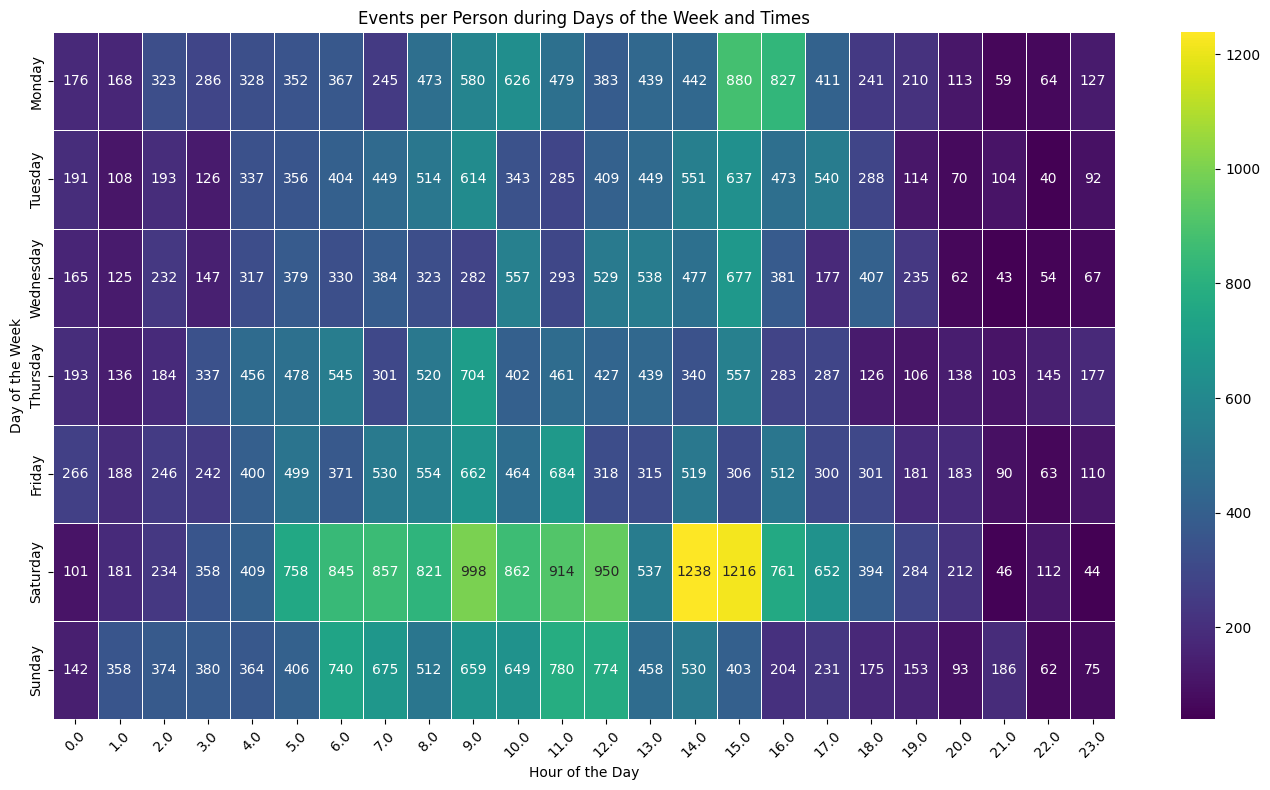

In [34]:
# Extract day of the week and hour from 'event_time'
df['day_of_week'] = df['event_time'].dt.day_name()
df['hour'] = df['event_time'].dt.hour

# Group by 'actor_id', 'day_of_week', and 'hour' and count the number of events
grouped = df.groupby(['actor_id', 'day_of_week', 'hour']).size().reset_index(name='event_count')

# Pivot the data to get days of the week as rows, hours as columns, and event counts as values
pivot_table = grouped.pivot_table(index='day_of_week', columns='hour', values='event_count', aggfunc='sum', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Events per Person during Days of the Week and Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

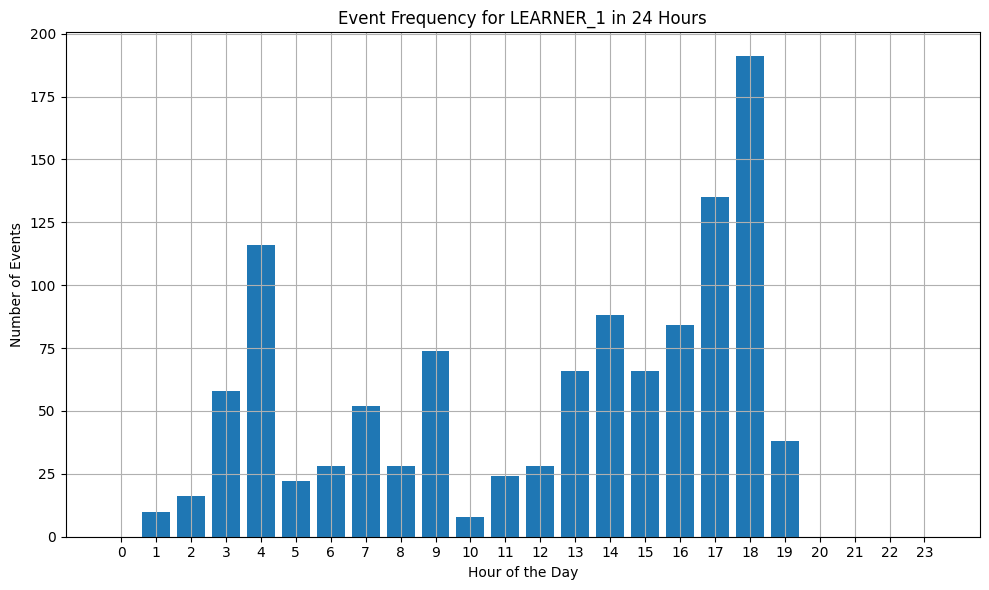

In [44]:
learners_df = df[~df['membership_role'].isnull()]

# Extract hour from 'event_time'
learners_df['hour'] = learners_df['event_time'].dt.hour

# Group by 'actor_id' and 'hour' and count the number of events
grouped = learners_df.groupby(['actor_id', 'hour']).size().reset_index(name='event_count')

# Select data for a specific learner, e.g., 'LEARNER_1'
learner_id = 'LEARNER_1'
learner_data = grouped[grouped['actor_id'] == learner_id]

# Ensure all hours are represented, even if some have zero events
all_hours = pd.DataFrame({'hour': range(24)})
learner_data = all_hours.merge(learner_data, on='hour', how='left').fillna(0)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(learner_data['hour'], learner_data['event_count'])
plt.title(f'Event Frequency for {learner_id} in 24 Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.xticks(range(24))
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()